<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

# Final Project KASDD
## Kelompok Kasded Sukses Sejahtera
Anggota:

Adrian Ardizza - 2006524896 - KASDD D

Fransisco William Sudianto - 2006596535 - KASDD D

M Abdurahman Basyah - 2006597241 - KASDD A

Muhammad Fadhlan - 1806205060 - KASDD F


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from numpy import where
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pointbiserialr, kurtosis

## Section 1: Exploratory Data Analysis

### Initial Dataset Loading

In [2]:
kos = pd.read_csv('rumah_kos.csv')
kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9459.0,15769.0,7131.0,35.0,700000.0,4.0,4,campur
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,9740.0,409.0,10582.0,9.0,2000000.0,6.0,3,campur
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1095.0,9261.0,2053.0,12.0,545000.0,1.0,14,putri
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3955.0,7319.0,3675.0,9.0,500000.0,5.0,62,putri
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6672.0,15763.0,7996.0,9.0,1500000.0,20.0,22,putri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3737.0,13349.0,5021.0,9.0,700000.0,5.0,16,putri
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2625.0,9410.0,1507.0,12.0,300000.0,26.0,104,putri
3290,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,7350.0,NaN,8176.0,9.0,675000.0,7.0,3,putra
3291,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4745.0,14483.0,3764.0,12.0,600000.0,16.0,79,putra


### Dataset Characteristics

#### Shape

In [3]:
kos.shape

(3293, 16)

The given dataset has dimensions of 3293 rows and 16 columns. In this dataset, 7 features are numerical features, 1 feature (gender) is a categorical feature, and the 8 remaining features are binary features with possible values of 0 or 1.

### Information

In [4]:
kos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fasilitas_1           3230 non-null   float64
 1   fasilitas_2           3219 non-null   float64
 2   fasilitas_3           3231 non-null   float64
 3   fasilitas_4           3222 non-null   float64
 4   fasilitas_5           3221 non-null   float64
 5   fasilitas_6           3229 non-null   float64
 6   fasilitas_7           3215 non-null   float64
 7   fasilitas_8           3225 non-null   float64
 8   jarak_poi_1           3226 non-null   float64
 9   jarak_poi_2           3226 non-null   float64
 10  jarak_poi_3           3207 non-null   float64
 11  luas_kamar            3225 non-null   float64
 12  harga_bulanan         3208 non-null   float64
 13  banyak_kamar          3223 non-null   float64
 14  banyak_pencarian_kos  3293 non-null   int64  
 15  gender               

In [5]:
kos.drop([f"fasilitas_{i}" for i in range(1, 9)], axis=1).describe().T[["mean", "50%"]]

,mean,50%
jarak_poi_1,4679.478921,3961.0
jarak_poi_2,9920.515189,9241.0
jarak_poi_3,4906.215778,3927.0
luas_kamar,12.143745,12.0
harga_bulanan,897502.908978,650000.0
banyak_kamar,10.506050,8.0
banyak_pencarian_kos,35.362587,20.0


In [6]:
modes = kos[[f"fasilitas_{i}" for i in range(1, 9)] + ["gender"]].mode()
modes.index = ["mode"]
modes.T

,mode
fasilitas_1,0.0
fasilitas_2,1.0
fasilitas_3,0.0
fasilitas_4,1.0
fasilitas_5,1.0
fasilitas_6,0.0
fasilitas_7,0.0
fasilitas_8,1.0
gender,putri


### Correlations

#### Numerical Feature Correlation

<AxesSubplot: >

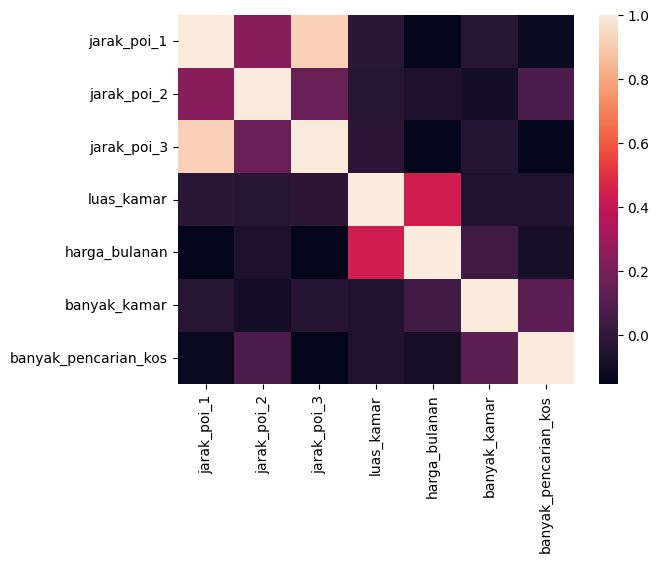

In [7]:
sns.heatmap(kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "harga_bulanan", "banyak_kamar", "banyak_pencarian_kos"]].corr())

#### Correlation of Facilities to Monthly Price
We use the point biserial method of correlation here to handle finding the correlation between discrete and numerical features.

In [8]:
categorical = kos.drop(["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "harga_bulanan", "gender"], axis=1)
categorical

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3290,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3291,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

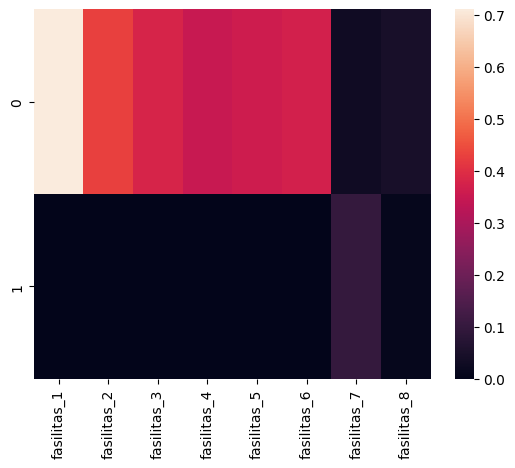

In [9]:
from scipy.stats import pointbiserialr

sns.heatmap(categorical.corrwith(kos['harga_bulanan'].astype('float'), method=pointbiserialr))

#### Pairplot of Dataset Features

#### Numerical Features

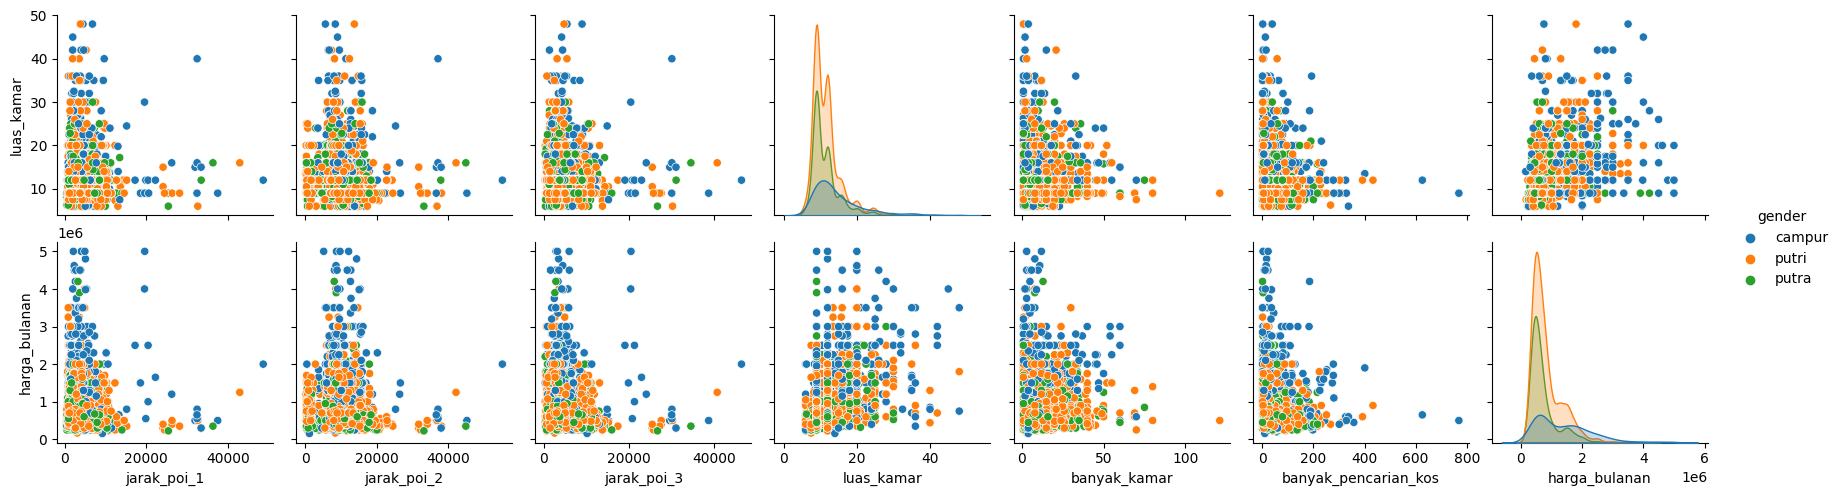

In [10]:
sns.pairplot(data=kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "harga_bulanan", "gender"]], y_vars=["luas_kamar", "harga_bulanan"], hue="gender")

#### Exploration

##### Facilities with Monthly Price

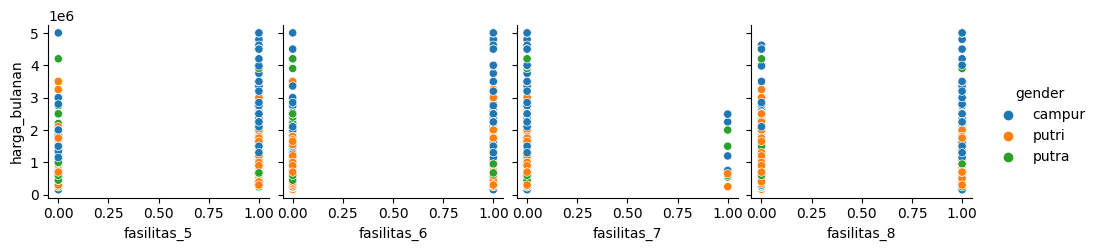

In [11]:
sns.pairplot(data=kos, y_vars=['harga_bulanan'], x_vars=[f'fasilitas_{i}' for i in range(5, 9)], hue='gender')

Secara individu, sebuah fasilitas tidak begitu berpengaruh terhadap pola harga bulanan karena pada sebagian besar kosan, terdapat lebih dari 1 fasilitas yang berkontribusi terhadap harganya. Sehingga pada tahap selanjutnya kita harus mempelajari hubungan antara keberadaan **beberapa** fasilitas pada suatu kos terhadap harga sewa-nya.

#### Correlation between Sets of Facilities to Gender

##### Kos Putri

In [12]:
female_kos = kos[kos["gender"] == "putri"].dropna()
female_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1095.0,9261.0,2053.0,12.0,545000.0,1.0,14,putri
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3955.0,7319.0,3675.0,9.0,500000.0,5.0,62,putri
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6672.0,15763.0,7996.0,9.0,1500000.0,20.0,22,putri
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,14043.0,23969.0,13225.0,12.0,400000.0,1.0,17,putri
9,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,4796.0,12331.0,2467.0,13.5,1300000.0,5.0,41,putri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8840.0,18825.0,8225.0,7.5,400000.0,8.0,32,putri
3287,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5430.0,15345.0,4755.0,25.0,900000.0,8.0,3,putri
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3737.0,13349.0,5021.0,9.0,700000.0,5.0,16,putri
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2625.0,9410.0,1507.0,12.0,300000.0,26.0,104,putri


In [13]:
female_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


Apabila kita melakukan filter terhadap semua kos putri yang ada pada dataset, maka terlihat bahwa sebagian besar kos putri memiliki fasilitas_2 sampai dengan fasilitas_5 terpenuhi berdasarkan modus dari setiap fasilitas yang ada. Untuk mendapatkan gambaran yang lebih lengkap mengenai hal tersebut, maka kita dapat menghitung persentase kos yang memiliki fitur-fitur tersebut.

In [14]:
count = {}
for i in range(1, 9):
    percent = (len(female_kos[female_kos[f"fasilitas_{i}"]== 1]) / len(female_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

fasilitas_putri = pd.DataFrame(count, index=["Kos Putri"])
fasilitas_putri

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Kos Putri,25.39%,62.34%,50.62%,64.14%,70.70%,39.61%,0.31%,47.34%


Berdasarkan perhitungan yang telah dilakukan diatas, terlihat bahwa fasilitas 2, 3, 4, 5 muncul di setidaknya 60% dari kos putri yang ada, fasilitas 8 pada 47% dari semua kos putri, fasilitas 6 pada 36% dari seluruh kos putri, fasilitas 1 ada pada 25% dari kos putri, dan fasilitas 7 tidak ada di hampir semua kos putri.

##### Kos Putra

In [15]:
male_kos = kos[kos["gender"] == "putra"].dropna()
male_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
8,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3821.0,8979.0,2539.0,9.0,850000.0,20.0,18,putra
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1694.0,8378.0,3365.0,12.0,700000.0,12.0,34,putra
30,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2780.0,8159.0,4874.0,9.0,1000000.0,3.0,18,putra
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4210.0,9901.0,2390.0,9.0,500000.0,9.0,5,putra
41,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,749.0,9676.0,1883.0,9.0,500000.0,10.0,6,putra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2176.0,8682.0,4353.0,9.0,400000.0,5.0,46,putra
3249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6826.0,15092.0,4751.0,16.0,450000.0,4.0,4,putra
3263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,914.0,10963.0,2330.0,12.0,550000.0,8.0,30,putra
3278,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,4449.0,5599.0,5464.0,18.0,950000.0,1.0,5,putra


In [16]:
male_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Berbeda dengan kos putri, pada umumnya kos putra hanya memiliki fasilitas 5, dan 8, dengan sebagian besar fasilitas yang lain-nya tidak ada pada sebagian besar kos putra. Persentase keberadaan fasilitas pada kos putra dapat dilihat sebagai berikut:

In [17]:
count = {}
for i in range(1, 9):
    percent = (len(male_kos[male_kos[f"fasilitas_{i}"]== 1]) / len(male_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

fasilitas_putra = pd.DataFrame(count, index=["Kos Putra"])
fasilitas_putra

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Kos Putra,15.06%,48.49%,38.88%,43.04%,51.65%,33.72%,0.72%,57.10%


Berdasarkan perhitungan diatas, terlihat bahwa sebagian besar kos pria memiliki fasilitas_5 dan fasilitas_8, dengan beberapa fasilitas lain seperti fasilitas_2 dan fasilitas_4 dimiliki oleh setidaknya 42% dari kos pria. Lalu setidaknya 33% kos pria memiliki fasilitas_3 dan fasilitas_6.

Menariknya, sama seperti pada kos putri, jumlah kos putra yang memiliki fasilitas_7 sangat sedikit (hanya 0.63%). Hal ini menunjukkan bahwa keberdaan fasilitas_7 tidak begitu dipengaruhi oleh tipe gender dari kosan

##### Kos Putra

In [18]:
mixed_kos = kos[kos["gender"] == "campur"].dropna()
mixed_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9459.0,15769.0,7131.0,35.0,700000.0,4.0,4,campur
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,9740.0,409.0,10582.0,9.0,2000000.0,6.0,3,campur
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5651.0,10730.0,3598.0,12.0,1500000.0,6.0,9,campur
22,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2063.0,9207.0,1626.0,12.0,600000.0,4.0,29,campur
25,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,9640.0,900.0,10253.0,9.0,750000.0,10.0,25,campur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,4543.0,9367.0,6863.0,9.0,2250000.0,12.0,42,campur
3256,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1489.0,8566.0,3146.0,12.0,1600000.0,34.0,34,campur
3266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6259.0,10288.0,4367.0,12.0,700000.0,11.0,10,campur
3272,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7732.0,9083.0,6247.0,16.0,1150000.0,2.0,19,campur


In [19]:
mixed_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


Pada umumnya kos campur pada dataset memiliki fasilitas_2, fasilitas_4, fasilitas_5, fasilitas_6, dan fasilitas_8. Hal ini sepertinya merupakan sebuah overlap antara fasilitas-fasilitas yang paling sering muncul pada kos putra dengan yang paling sering muncul di kos putri.

In [20]:
count = {}
for i in range(1, 9):
    percent = (len(mixed_kos[mixed_kos[f"fasilitas_{i}"]== 1]) / len(mixed_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

fasilitas_mixed = pd.DataFrame(count, index=["Kos Campuran"])
fasilitas_mixed

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Kos Campuran,44.92%,75.62%,44.70%,55.30%,68.62%,62.75%,0.90%,55.30%


In [21]:
pd.concat([fasilitas_putra, fasilitas_putri, fasilitas_mixed]).T

,Kos Putra,Kos Putri,Kos Campuran
fasilitas_1,15.06%,25.39%,44.92%
fasilitas_2,48.49%,62.34%,75.62%
fasilitas_3,38.88%,50.62%,44.70%
fasilitas_4,43.04%,64.14%,55.30%
fasilitas_5,51.65%,70.70%,68.62%
fasilitas_6,33.72%,39.61%,62.75%
fasilitas_7,0.72%,0.31%,0.90%
fasilitas_8,57.10%,47.34%,55.30%


## Section 2: Data Pre-Processing

### Null Data

#### Percentage of NULL

In [22]:
kos.isna().sum().divide(len(kos))

fasilitas_1             0.019131
fasilitas_2             0.022472
fasilitas_3             0.018828
fasilitas_4             0.021561
fasilitas_5             0.021865
fasilitas_6             0.019435
fasilitas_7             0.023687
fasilitas_8             0.020650
jarak_poi_1             0.020346
jarak_poi_2             0.020346
jarak_poi_3             0.026116
luas_kamar              0.020650
harga_bulanan           0.025812
banyak_kamar            0.021257
banyak_pencarian_kos    0.000000
gender                  0.000000
dtype: float64

#### Filling NaN Attributes

We fill NaN atrributes in each column with the Mode (for categorical data) or the mean/median (for numerical data) depending on the results of the builtin `DataFrame.describe()` function.

In [23]:
kos.describe().T[['mean', '50%']].T

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos
mean,0.26161,0.608263,0.456515,0.562384,0.641416,0.427687,0.004666,0.51845,4679.478921,9920.515189,4906.215778,12.143745,897502.908978,10.50605,35.362587
50%,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,3961.000000,9241.000000,3927.000000,12.000000,650000.000000,8.00000,20.000000


In [24]:
for i in range(1, 9):
    kos[f'fasilitas_{i}'] = kos[f'fasilitas_{i}'].fillna(kos[f'fasilitas_{i}'].mode)
for i in range(1, 4):
    kos[f'jarak_poi_{i}'] = kos[f'jarak_poi_{i}'].fillna(kos[f'jarak_poi_{i}'].median())

kos['luas_kamar'] = kos['luas_kamar'].fillna(kos['luas_kamar'].mean())
kos['harga_bulanan'] = kos['harga_bulanan'].fillna(kos['harga_bulanan'].mean())
kos['banyak_kamar'] = kos['banyak_kamar'].fillna(kos['banyak_kamar'].median())
kos['banyak_pencarian_kos'] = kos['banyak_pencarian_kos'].fillna(kos['banyak_pencarian_kos'].median())

In [25]:
def check_distribution(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    column_to_check = kos[column]
    sns.kdeplot(column_to_check, color='r', shade=True, label=column)
    ax.legend()
    plt.tight_layout()
    plt.title("Data Distribution " + column)
    return plt.show()

### Section 3: Data Modeling

In [26]:
import lazypredict

In [27]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [36]:
X = kos.drop(["harga_bulanan", "gender"], axis=1)
y = kos["harga_bulanan"]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [44]:
X_train

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,banyak_kamar,banyak_pencarian_kos
2261,False,True,True,False,False,False,False,True,10059.00,1021.00,10618.00,12.00,8.00,12
2504,False,False,False,False,False,False,False,False,5543.00,15577.00,5708.00,12.00,14.00,2
1781,False,False,True,True,True,False,False,True,3807.00,13802.00,3545.00,7.50,5.00,6
117,True,True,True,True,True,True,False,False,4176.00,7335.00,3772.00,12.00,5.00,12
2984,False,True,False,False,False,False,False,False,6843.00,7444.00,5844.00,20.00,5.00,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,True,False,True,True,True,True,False,False,1587.00,10422.00,762.00,9.90,2.00,3
3089,True,True,True,True,True,False,False,False,3597.00,6489.00,4912.00,12.00,16.00,101
1766,False,False,False,True,True,False,False,False,4978.00,15025.00,4918.00,9.00,10.00,28
1122,True,True,False,True,True,False,False,True,10251.00,441.00,11106.00,12.00,4.00,4


In [46]:
y_test

1479   2000000.00
2718    500000.00
2645    500000.00
2725    650000.00
1563    300000.00
          ...    
897    1500000.00
265     900000.00
1327    500000.00
2082    700000.00
2603    375000.00
Name: harga_bulanan, Length: 659, dtype: float64

In [42]:
X[[f"fasilitas_{i}" for i in range(1, 9)]] = X[[f"fasilitas_{i}" for i in range(1, 9)]].astype("bool")
X

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,banyak_kamar,banyak_pencarian_kos
0,False,True,False,False,False,False,False,False,9459.00,15769.00,7131.00,35.00,4.00,4
1,False,True,False,True,True,True,False,False,9740.00,409.00,10582.00,9.00,6.00,3
2,False,True,True,False,False,False,False,False,1095.00,9261.00,2053.00,12.00,1.00,14
3,False,False,True,True,True,False,False,True,3955.00,7319.00,3675.00,9.00,5.00,62
4,True,True,True,True,True,True,False,True,6672.00,15763.00,7996.00,9.00,20.00,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,False,True,False,False,False,True,False,True,3737.00,13349.00,5021.00,9.00,5.00,16
3289,False,True,False,True,True,True,False,True,2625.00,9410.00,1507.00,12.00,26.00,104
3290,False,True,False,False,True,True,False,False,7350.00,9241.00,8176.00,9.00,7.00,3
3291,False,False,True,False,False,False,False,False,4745.00,14483.00,3764.00,12.00,16.00,79


In [48]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [06:12<00:00,  8.86s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.31,0.33,570357.07,0.89
LGBMRegressor,0.30,0.32,574017.52,0.08
ExtraTreesRegressor,0.29,0.30,579800.66,0.54
GradientBoostingRegressor,0.28,0.29,584484.23,0.31
HistGradientBoostingRegressor,0.27,0.29,587547.52,0.67
XGBRegressor,0.26,0.28,591588.95,0.15
BaggingRegressor,0.25,0.26,597662.13,0.10
LassoCV,0.18,0.20,622494.93,0.05
LassoLars,0.18,0.20,622516.46,0.01
